In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
file_path = "../data/final/merged_double_digit.csv"

In [4]:
df = pd.read_csv(file_path, index_col=None, header=0)

In [5]:
df.head()

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack
0,2021,AG,30,1.710857e+06,1.724699e+06,1.824801e+06,13841.72964
1,2021,AG,31,4.651056e+05,4.463477e+05,4.863379e+05,-18757.87605
2,2021,AG,33,2.643898e+05,2.368410e+05,2.019982e+05,-27548.79548
3,2021,AG,35,3.554536e+05,3.509999e+04,1.177362e+05,-320353.65550
4,2021,AG,36,2.922549e+06,2.745166e+06,2.777999e+06,-177383.42905


In [6]:
df.dtypes

Year            int64
Region         object
Acc-ID          int64
Realized      float64
Budget y      float64
Budget y+1    float64
Slack         float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10784 entries, 0 to 10783
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        10784 non-null  int64  
 1   Region      10784 non-null  object 
 2   Acc-ID      10784 non-null  int64  
 3   Realized    10784 non-null  float64
 4   Budget y    10784 non-null  float64
 5   Budget y+1  10784 non-null  float64
 6   Slack       10784 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 589.9+ KB


In [8]:
df.describe()

,Year,Acc-ID,Realized,Budget y,Budget y+1,Slack
count,10784.000000,10784.000000,1.078400e+04,1.078400e+04,1.078400e+04,1.078400e+04
mean,2016.780137,46.457344,4.047852e+05,1.971534e+05,2.098036e+05,-5.431345e+03
std,3.521107,14.304301,1.404009e+06,7.076003e+05,7.422462e+05,7.012301e+04
min,2011.000000,10.000000,-2.458455e+06,-4.180000e+02,-5.103187e+04,-2.632937e+06
25%,2014.000000,37.000000,1.332280e+02,0.000000e+00,0.000000e+00,-8.821500e+02
50%,2017.000000,47.000000,1.947300e+04,7.334000e+03,8.281500e+03,0.000000e+00
75%,2020.000000,58.000000,1.897246e+05,9.378817e+04,1.017663e+05,5.628250e+02
max,2022.000000,68.000000,2.190177e+07,1.272903e+07,1.272903e+07,1.899872e+06


In [9]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack
1525,2014,AI,54,0.000000e+00,0.000000e+00,0.000,0.00000
1529,2014,AI,60,0.000000e+00,0.000000e+00,0.000,0.00000
1530,2014,AI,61,0.000000e+00,0.000000e+00,0.000,0.00000
1630,2014,AG,30,1.632056e+06,1.629823e+06,1607797.012,-2233.36215
1634,2014,AG,39,2.019090e+05,2.223362e+05,227074.100,20427.21940
...,...,...,...,...,...,...,...
9013,2017,BE,30,2.911904e+06,2.913001e+06,2959216.000,1097.41437
9017,2017,BE,39,1.985180e+05,1.457167e+05,161049.000,-52801.29600
9022,2017,BE,49,1.985180e+05,1.480421e+05,161049.000,-50475.86000
9469,2017,SH,60,0.000000e+00,0.000000e+00,0.000,0.00000


In [10]:
df.sample(10)

,Year,Region,Acc-ID,Realized,Budget y,Budget y+1,Slack
6801,2016,NW,61,0.000000e+00,0.000,0.000,0.000000
8573,2013,AR,35,2.055800e+03,709.400,753.200,-1346.400000
9658,2017,VS,34,4.287342e+05,428900.400,427131.625,166.238305
8524,2013,BL,61,0.000000e+00,0.000,0.000,0.000000
8036,2018,NE,30,4.998760e+05,432828.811,443675.910,-67047.231000
7252,2016,VS,34,4.120747e+05,408823.375,428900.400,-3251.275000
972,2021,ZG,46,6.412987e+05,550528.800,654100.700,-90769.900000
8140,2013,ZH,60,1.122171e+04,100.000,160.000,-11121.709090
10301,2022,NW,14,3.453043e+05,358719.344,360041.100,13415.044000
3765,2020,VS,14,1.914463e+06,0.000,0.000,0.000000


In [11]:
agg_year_region_df = df.groupby(['Year', 'Region', 'Acc-ID']).agg({'Realized': 'sum', 'Budget y': 'sum'}).reset_index()

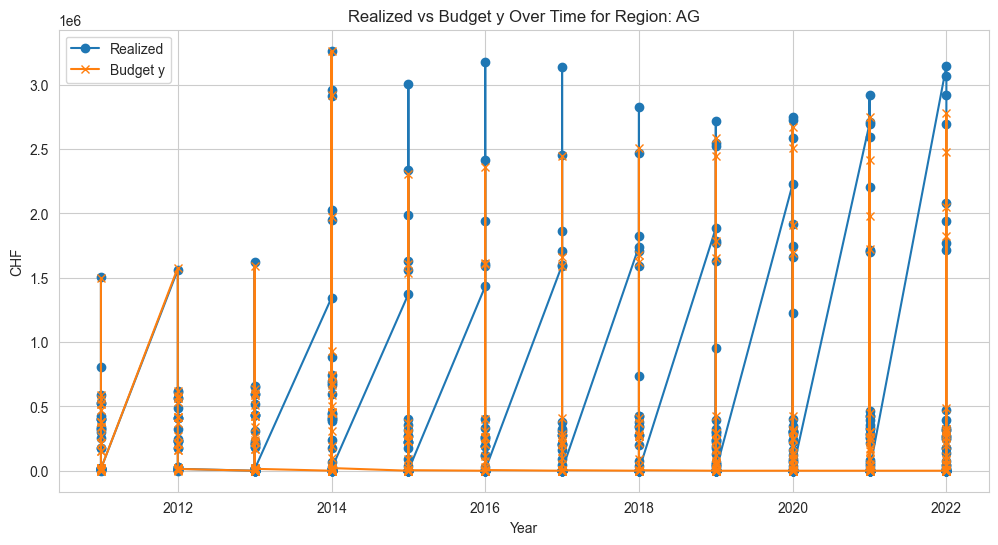

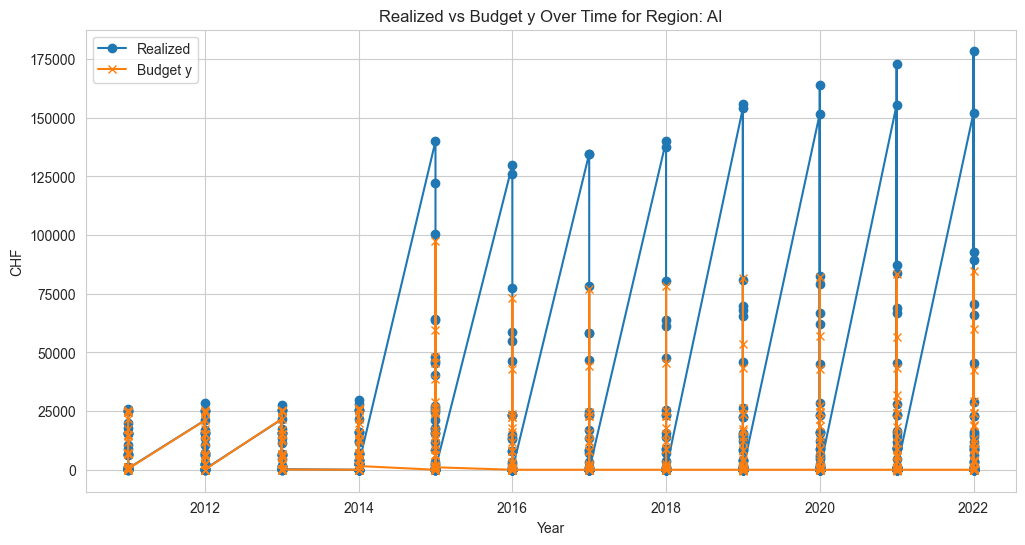

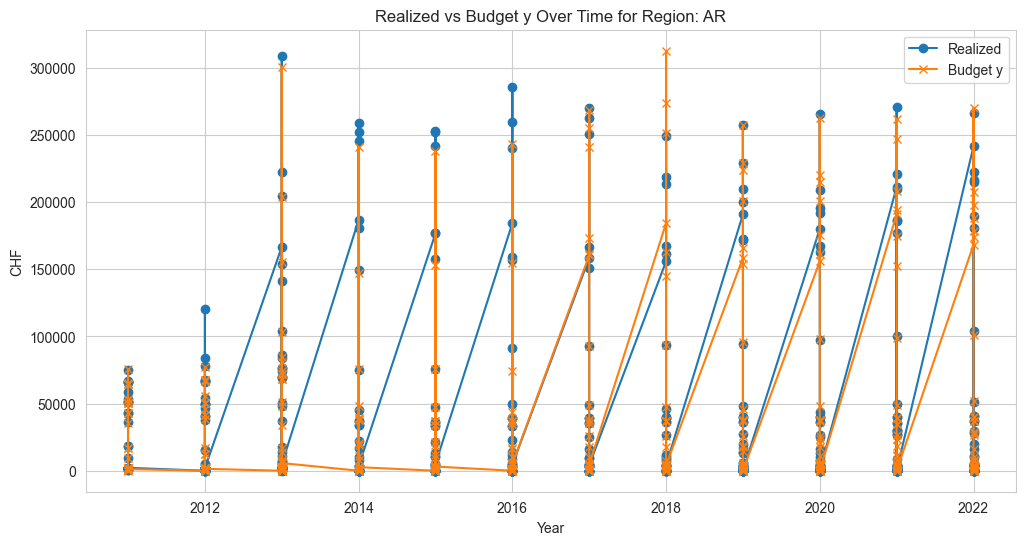

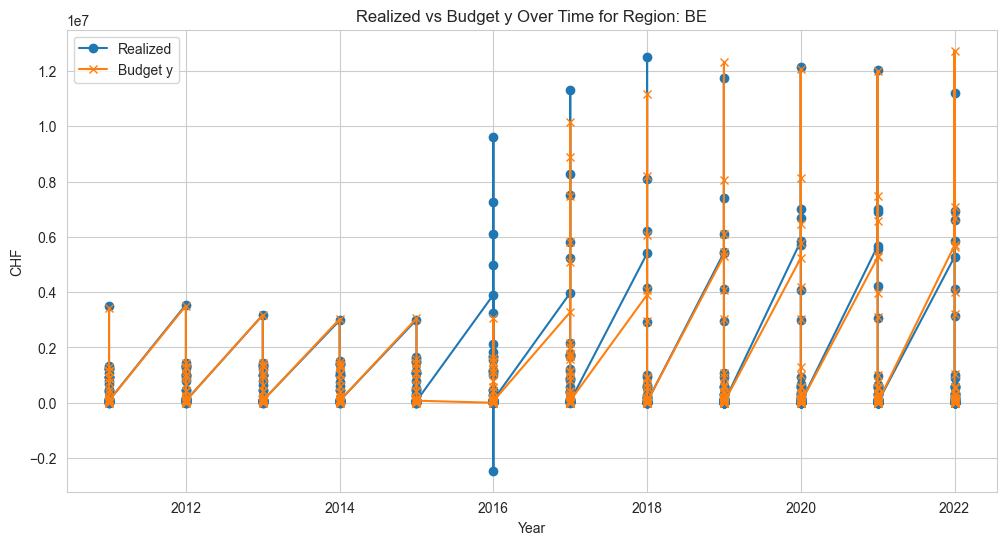

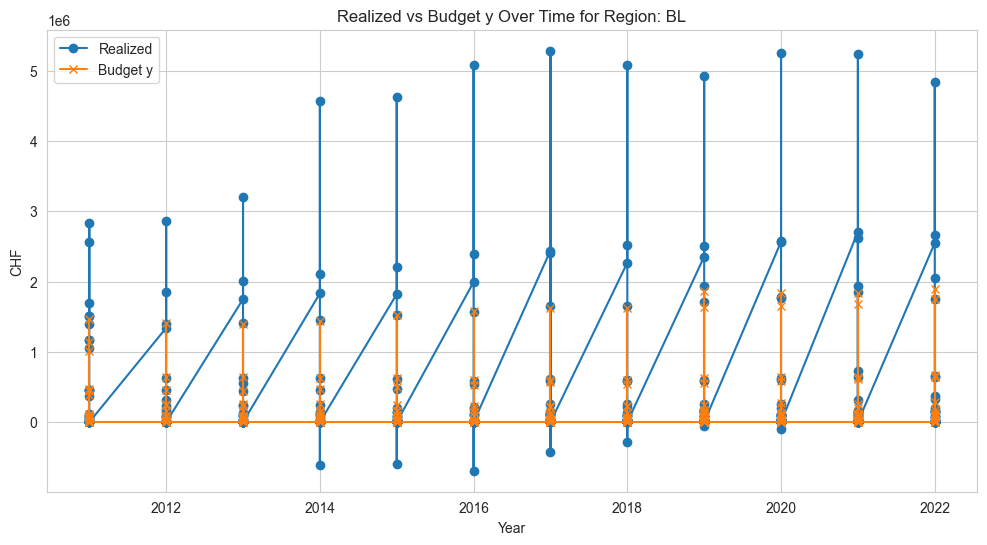

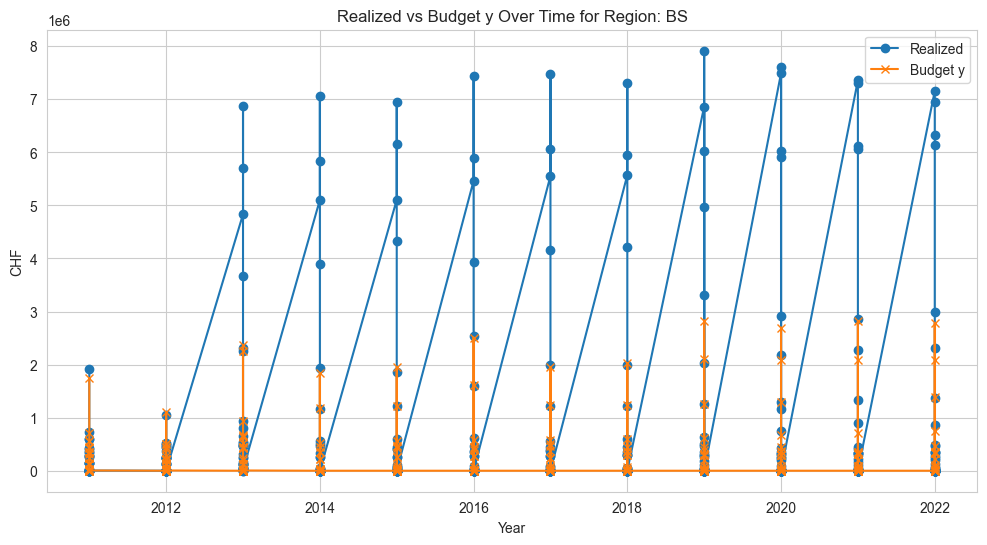

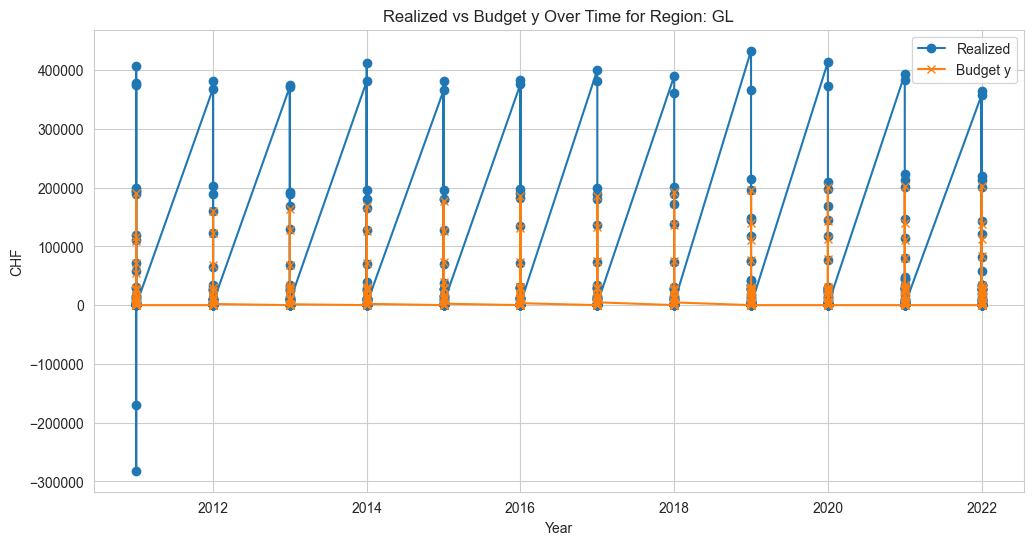

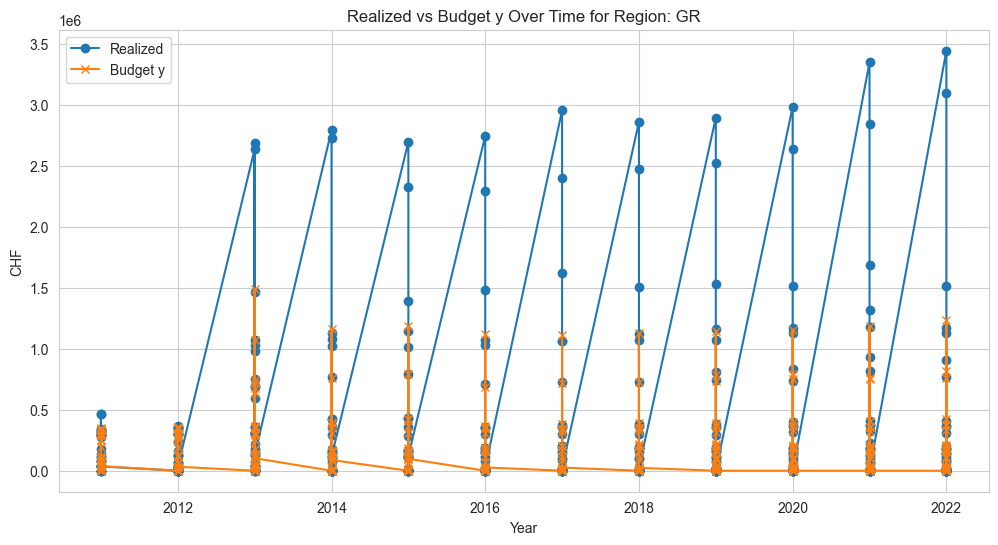

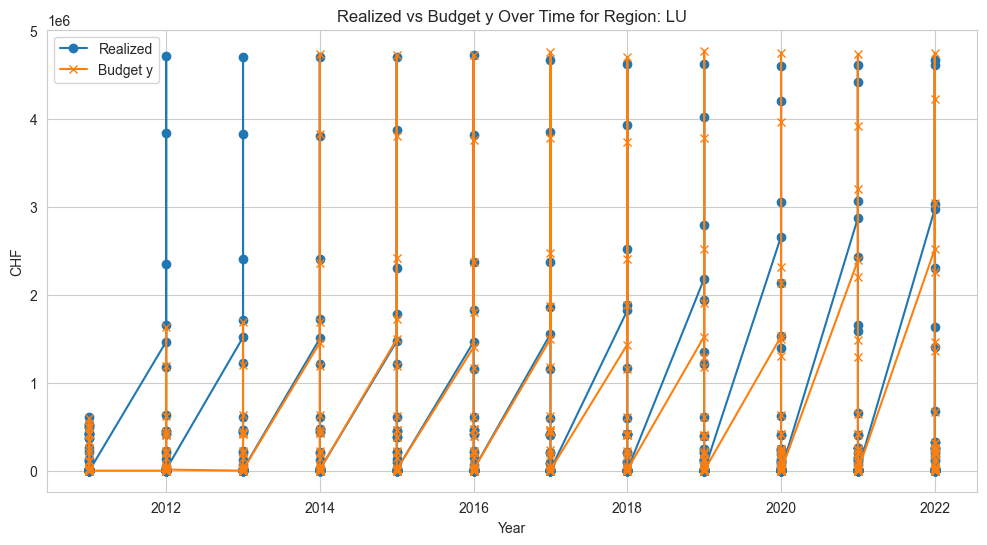

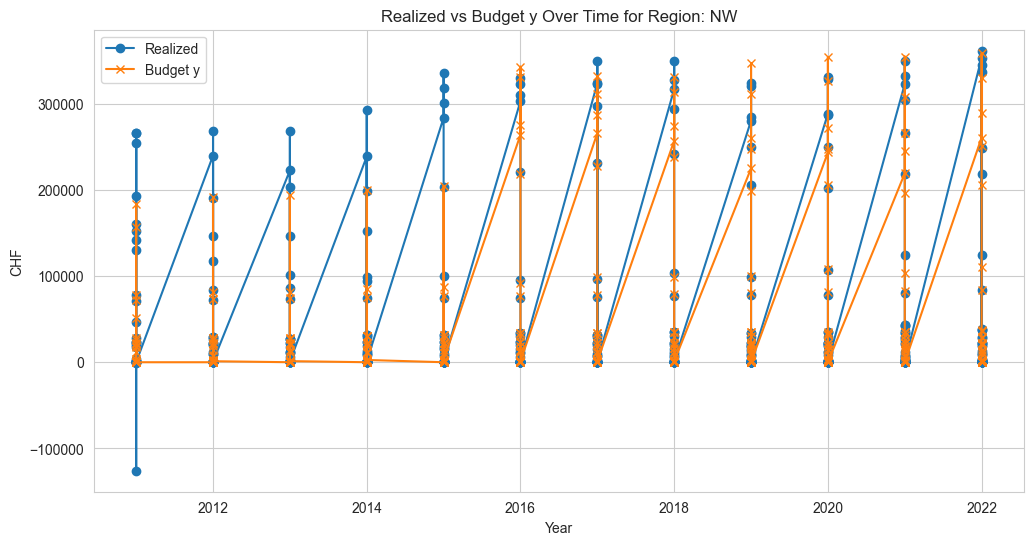

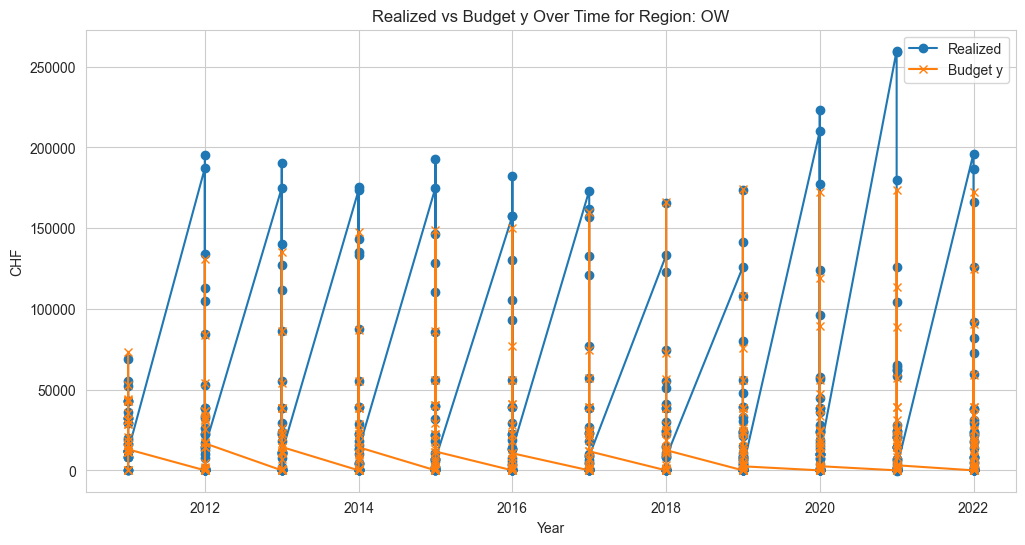

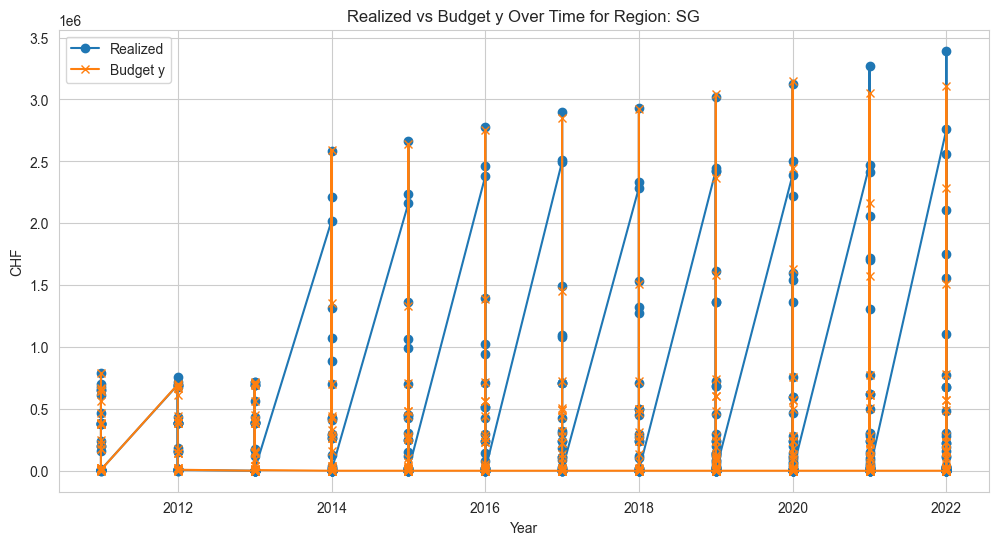

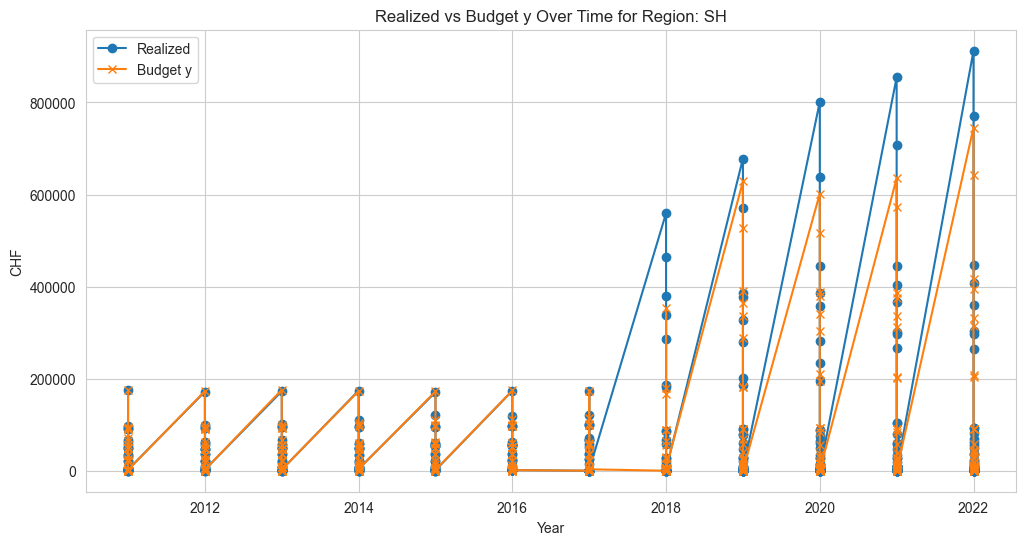

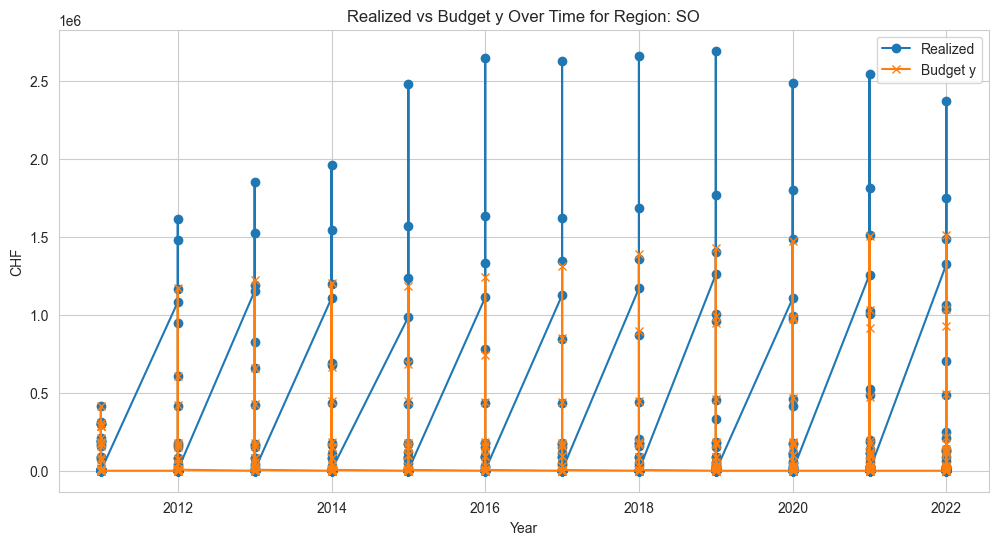

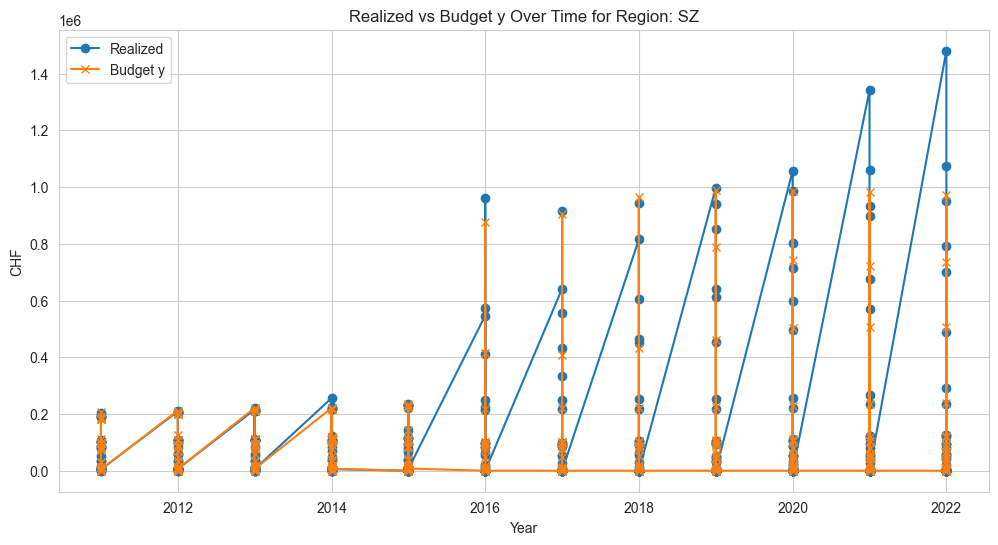

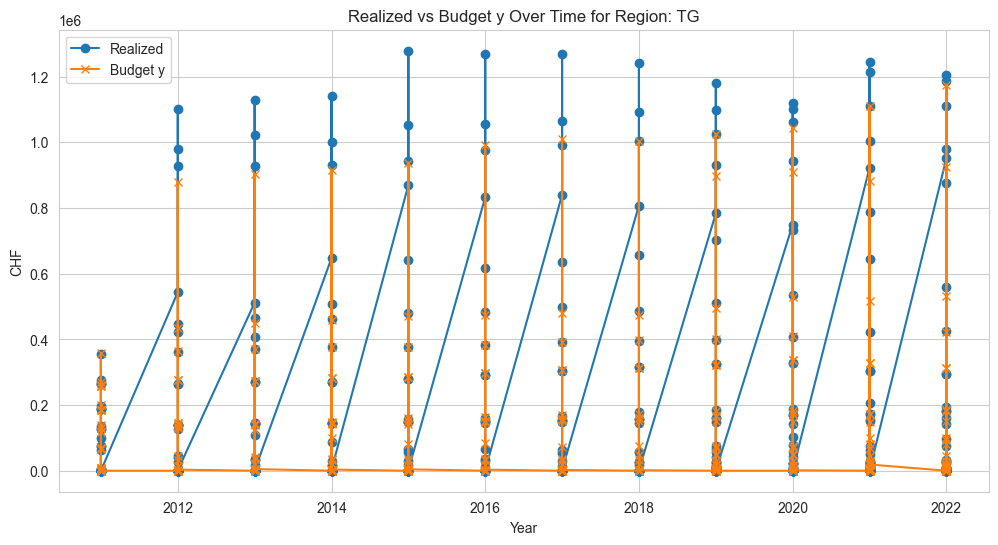

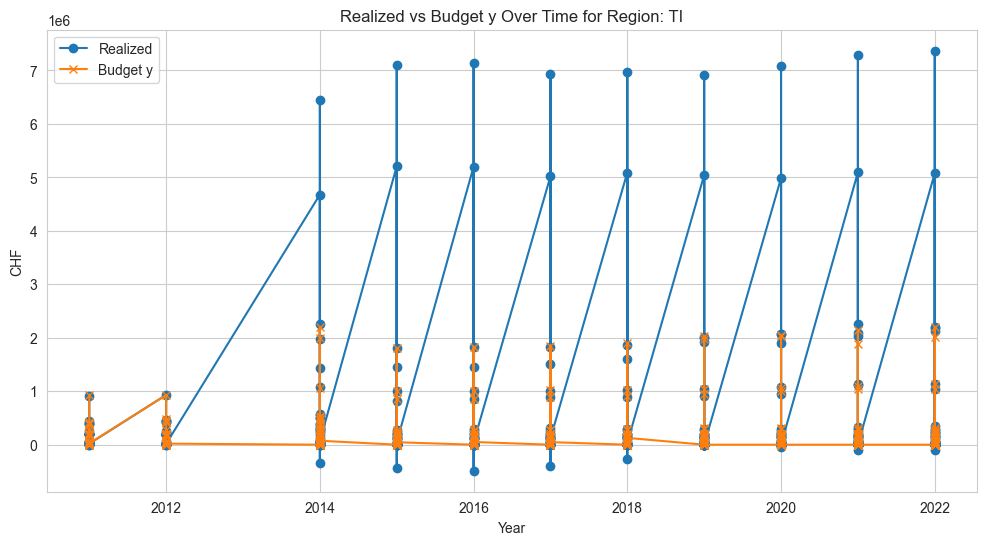

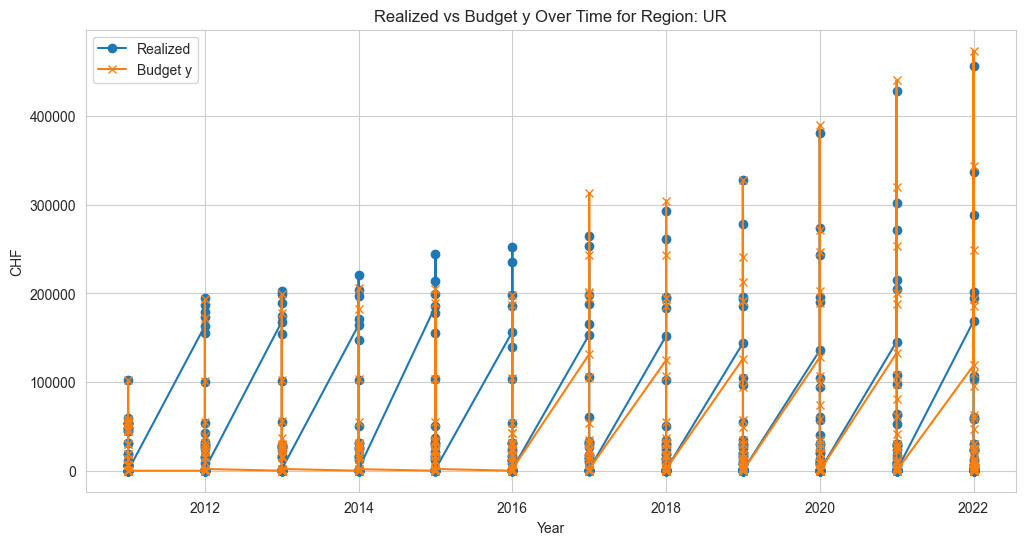

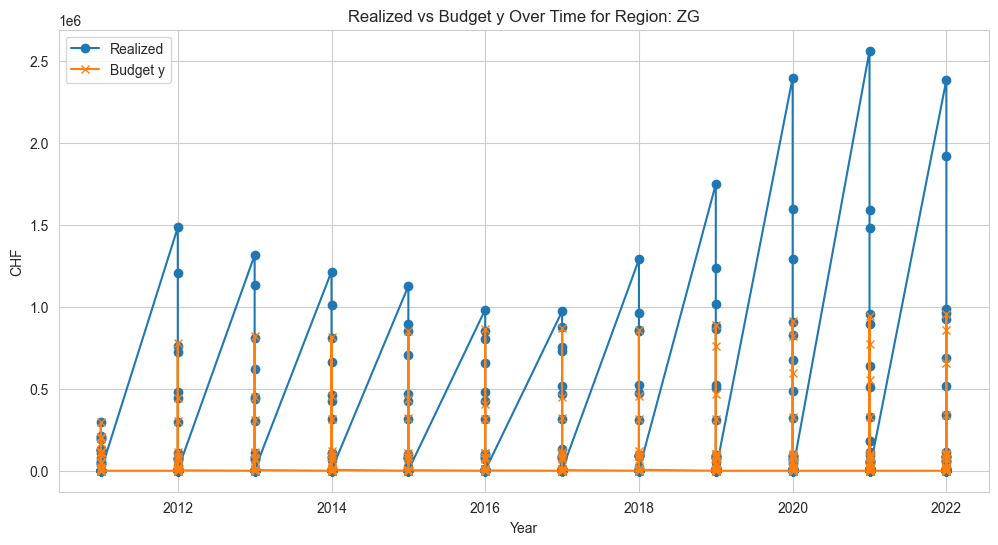

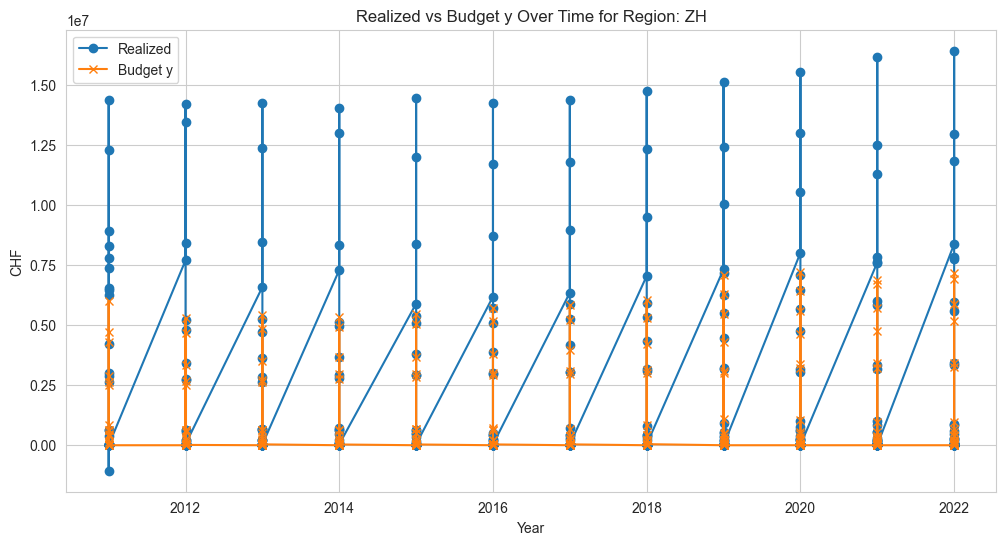

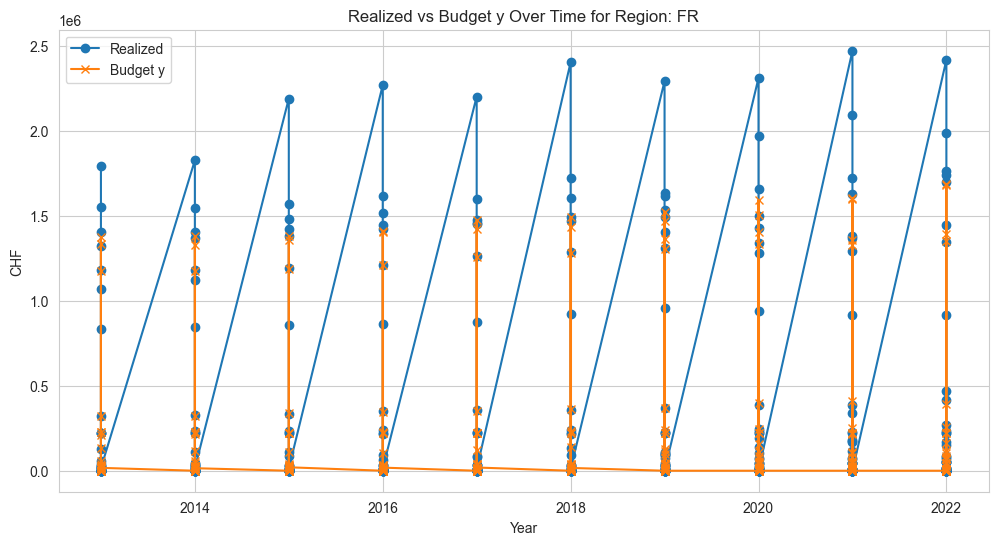

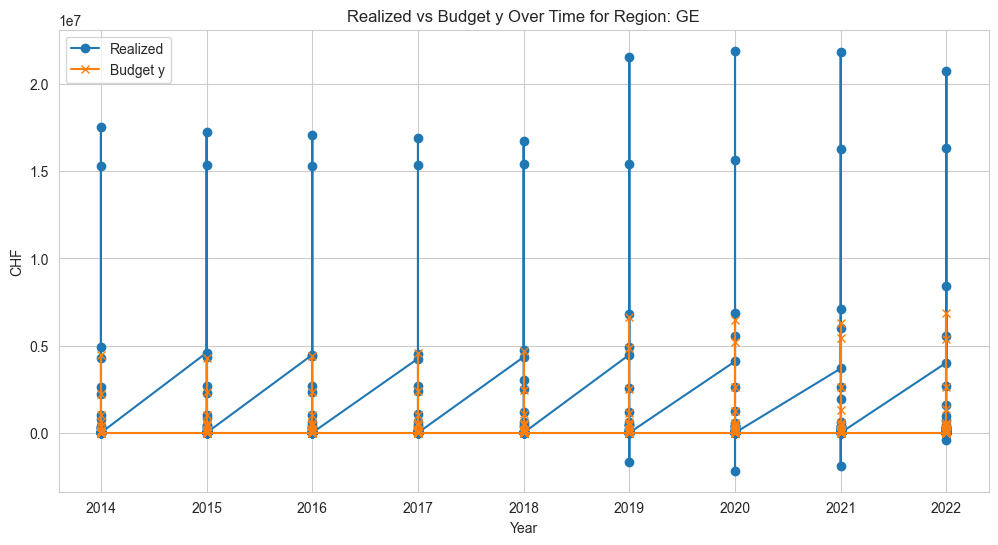

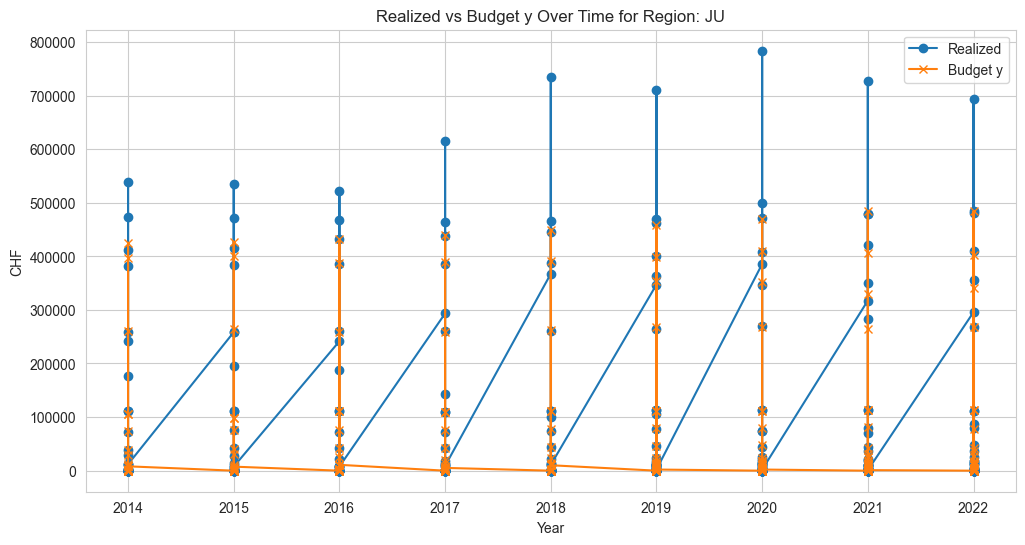

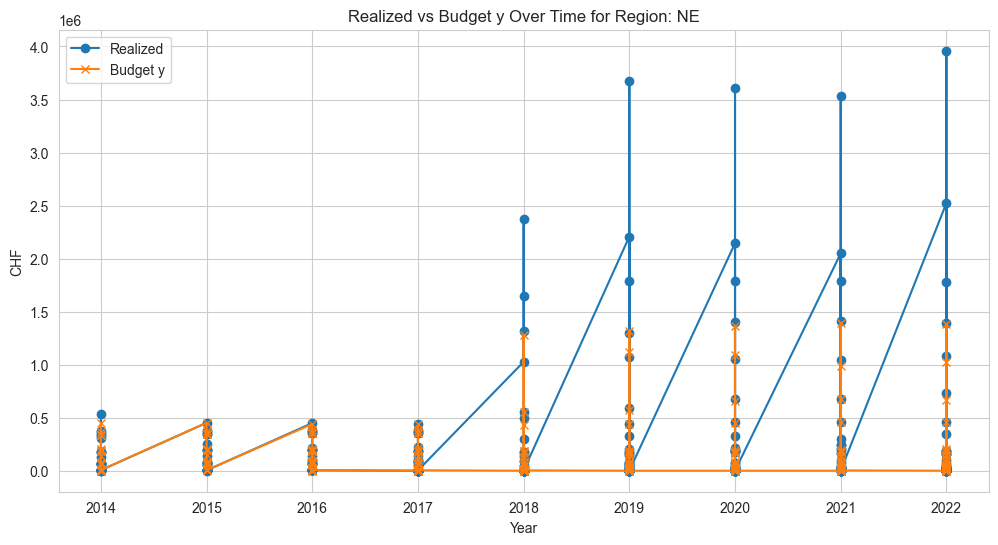

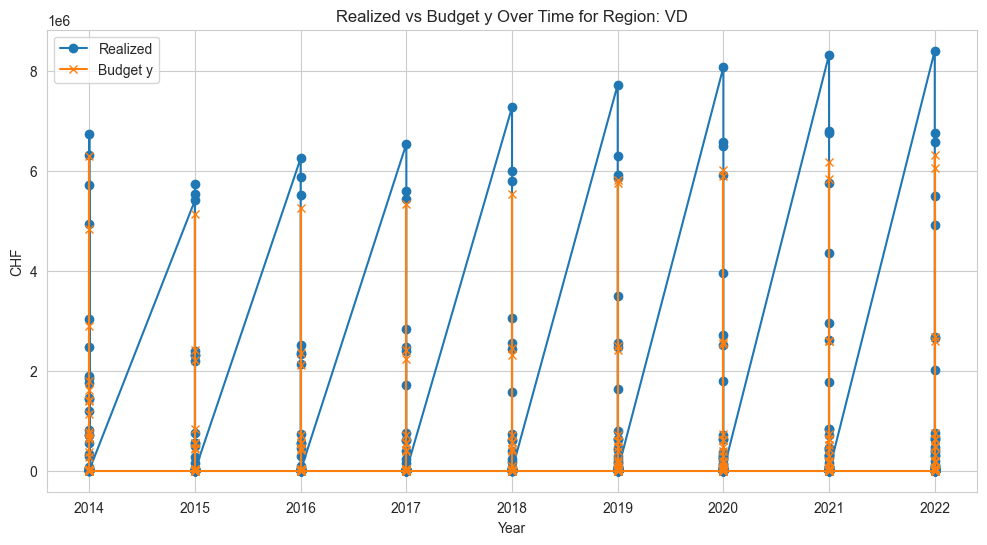

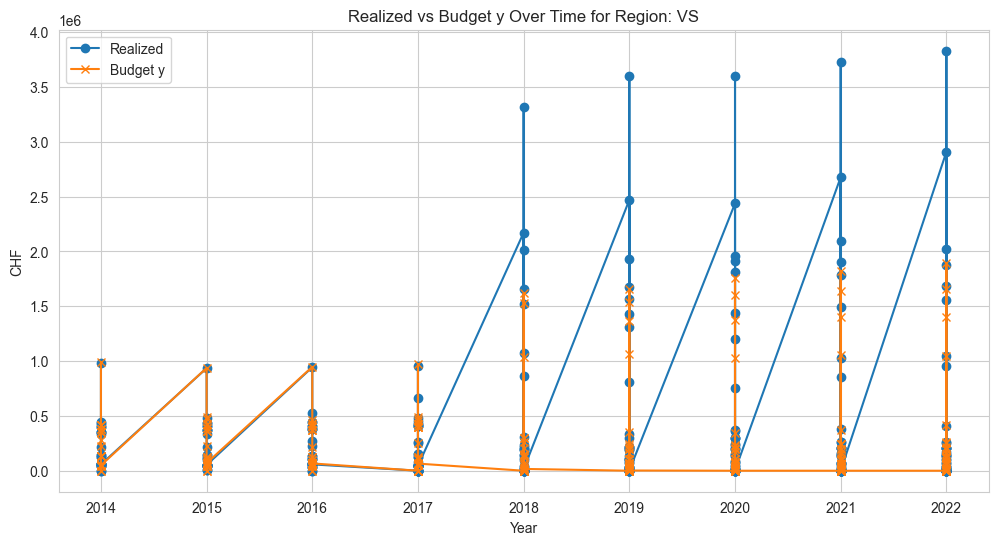

In [12]:
for region in agg_year_region_df['Region'].unique():
    region_df = agg_year_region_df[agg_year_region_df['Region'] == region]
    plt.figure(figsize=(12, 6))
    plt.plot(region_df['Year'], region_df['Realized'], label='Realized', marker='o')
    plt.plot(region_df['Year'], region_df['Budget y'], label='Budget y', marker='x')
    
    plt.title(f"Realized vs Budget y Over Time for Region: {region}")
    plt.xlabel("Year")
    plt.ylabel("CHF")
    plt.legend()
    plt.show()

In [13]:
agg_region_slack_df = df.groupby(['Year', 'Region'])['Slack'].sum().reset_index()

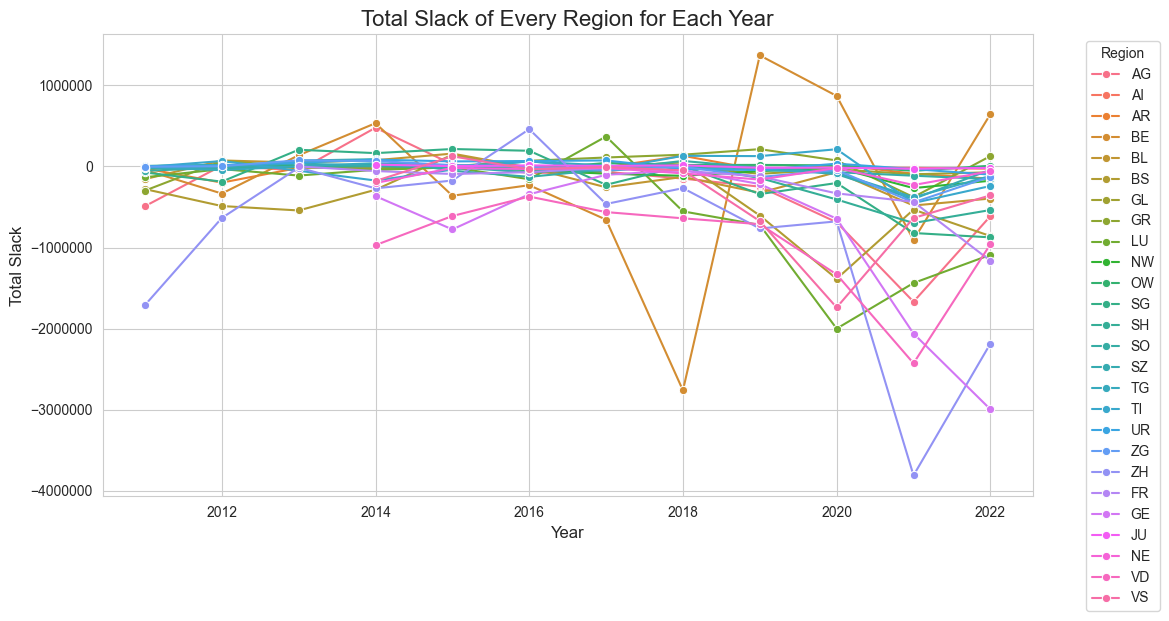

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_region_slack_df, x='Year', y='Slack', hue='Region', marker='o')

plt.title("Total Slack of Every Region for Each Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Slack", fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) 

plt.show()


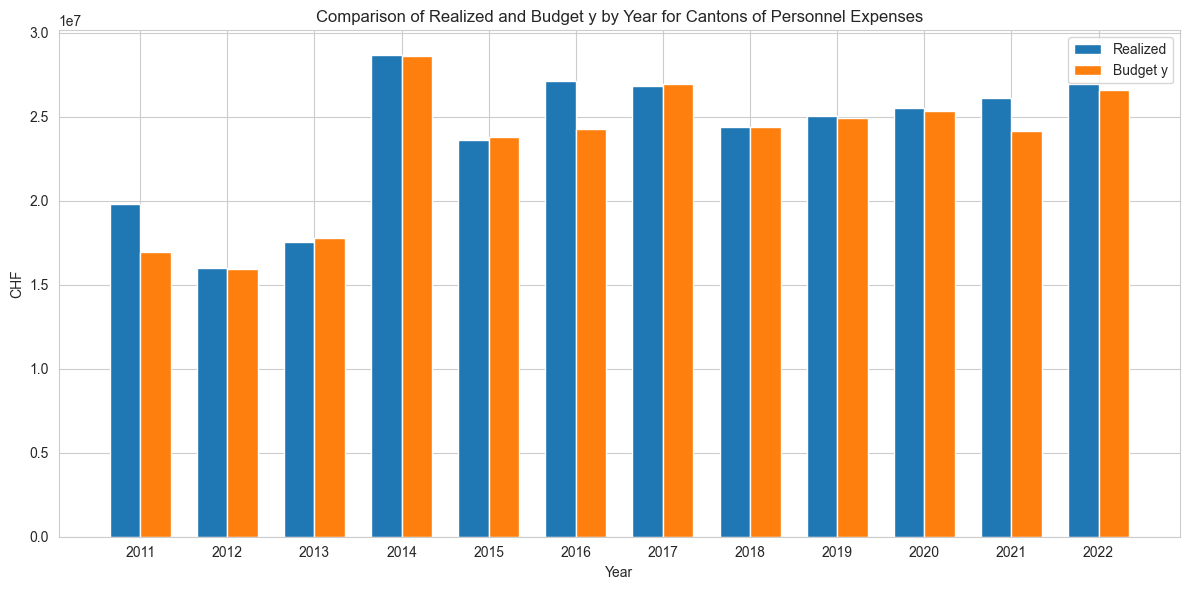

In [17]:
personel_expenses_df = df[df['Acc-ID'] == 30]

# Group the data by year and calculate the sum of 'Realized' and 'Budget y' for each year
grouped_data = personel_expenses_df.groupby('Year')[['Realized', 'Budget y']].sum().reset_index()

# Set the years as the x-axis labels
years = grouped_data['Year']

# Get the Realized and Budget y values for each year
realized_values = grouped_data['Realized']
budget_values = grouped_data['Budget y']

bar_width = 0.35

# Create an index for the x-axis positions of the bars
x = range(len(years))

# Create the bar plots
plt.figure(figsize=(12, 6))
plt.bar(x, realized_values, width=bar_width, label='Realized', align='center')
plt.bar([i + bar_width for i in x], budget_values, width=bar_width, label='Budget y', align='center')

# Set x-axis labels and title
plt.xlabel('Year')
plt.xticks([i + bar_width / 2 for i in x], years)
plt.ylabel('CHF')
plt.title('Comparison of Realized and Budget y by Year for Cantons of Personnel Expenses')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

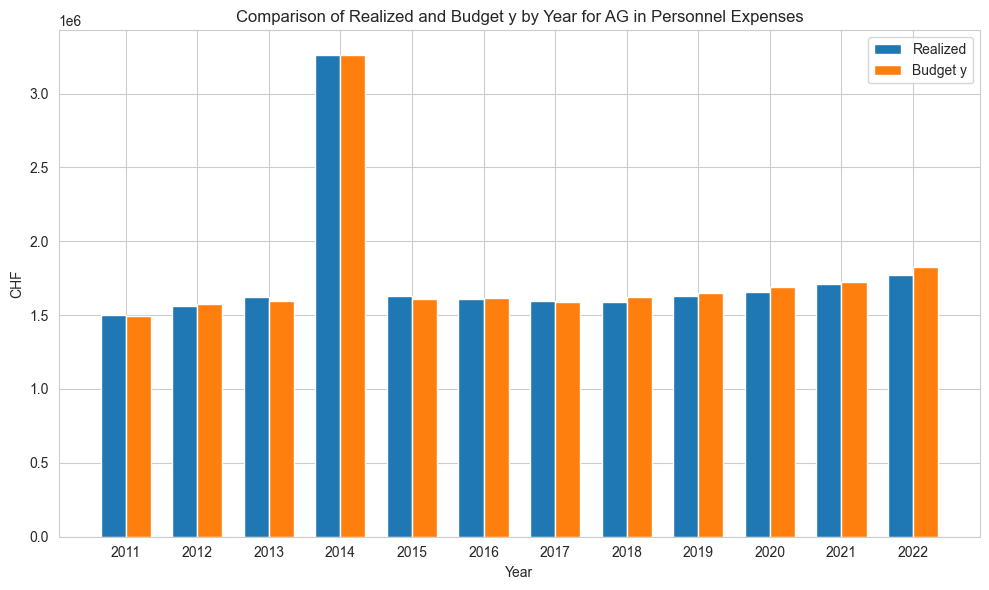

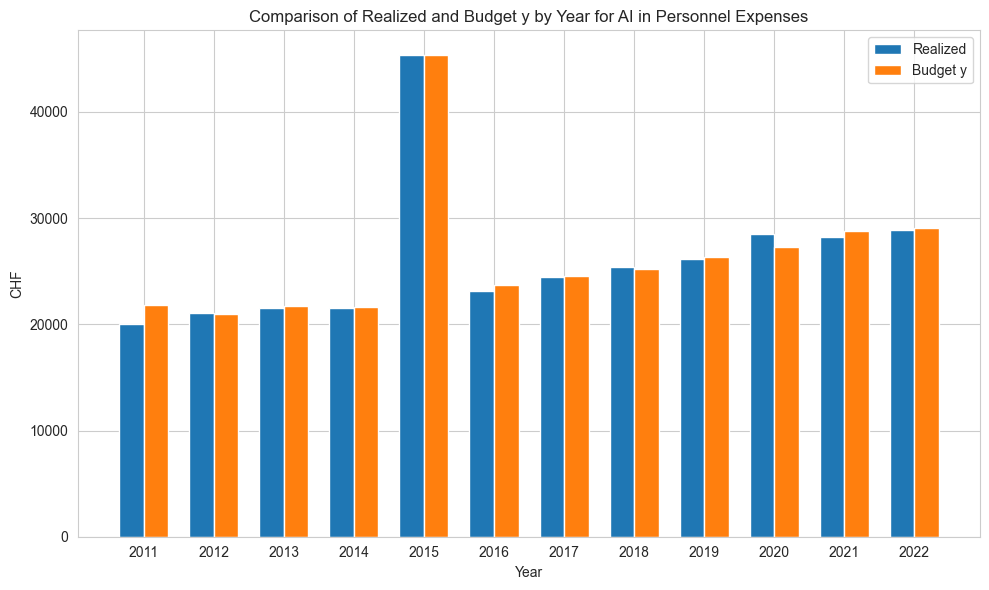

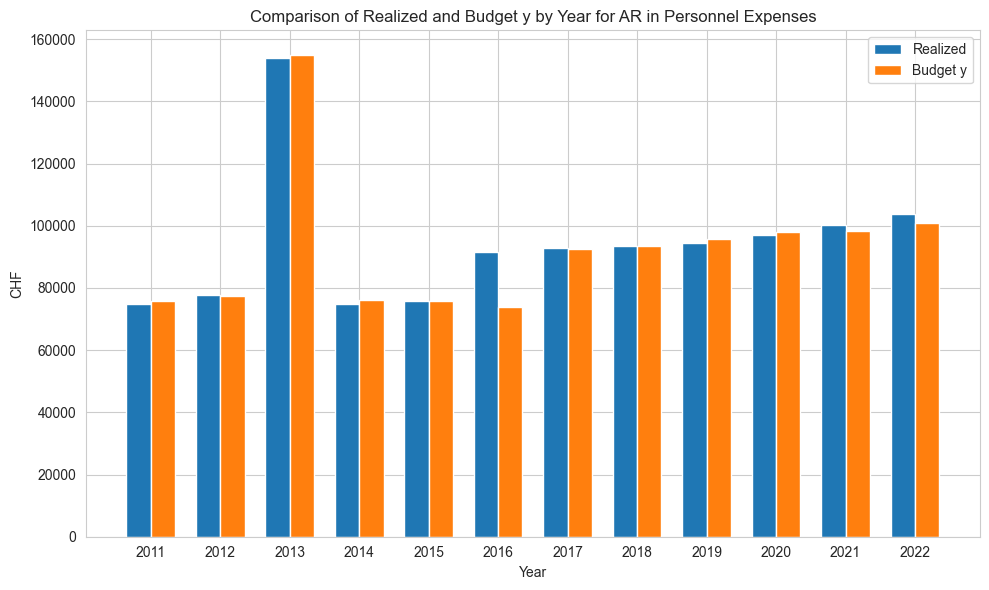

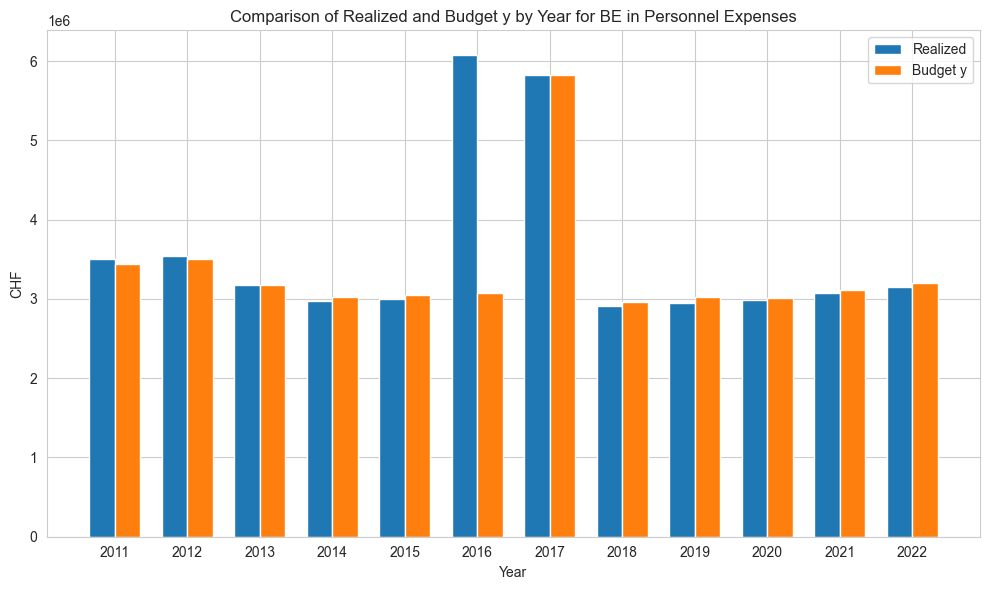

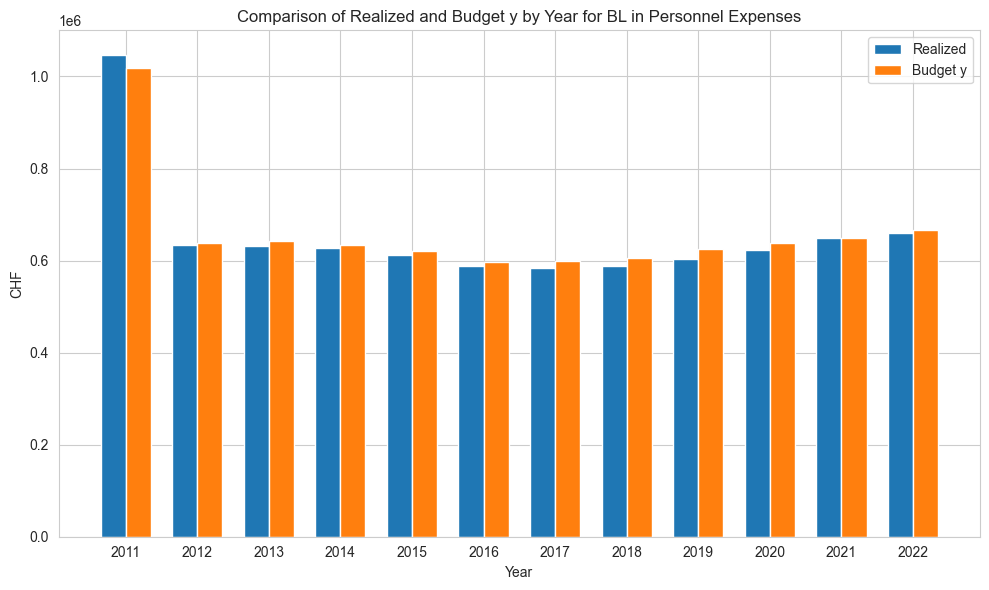

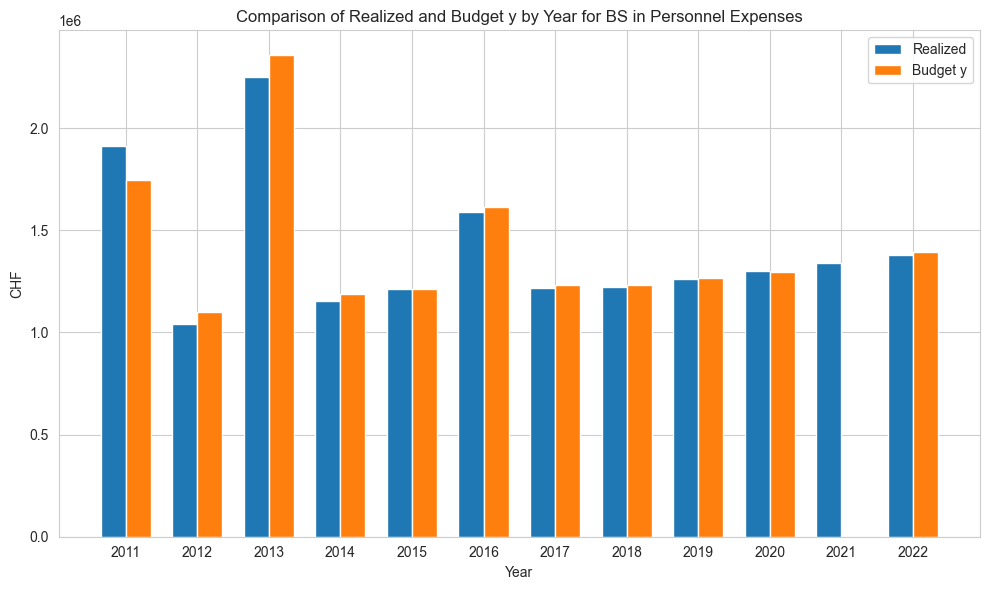

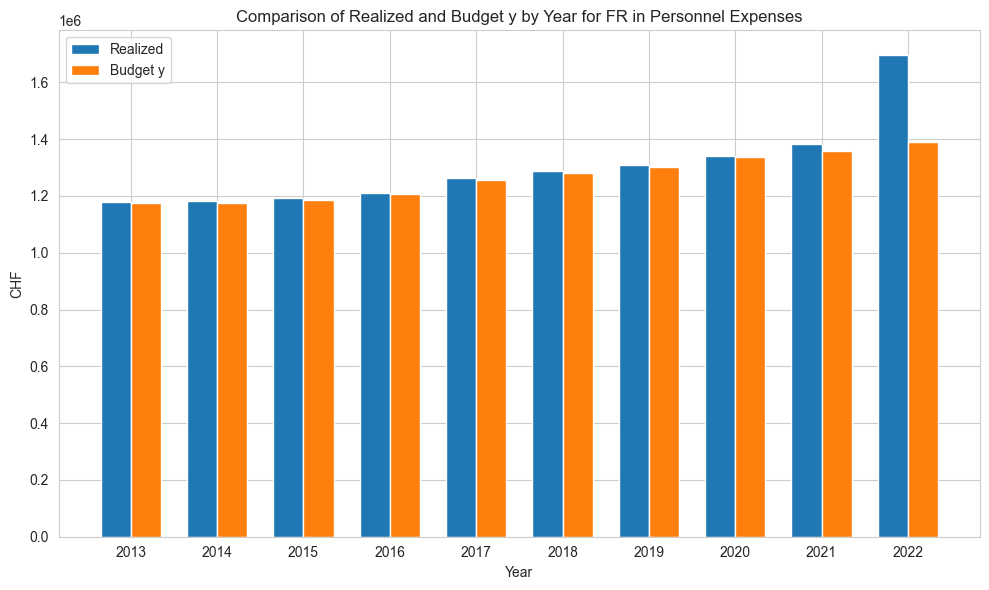

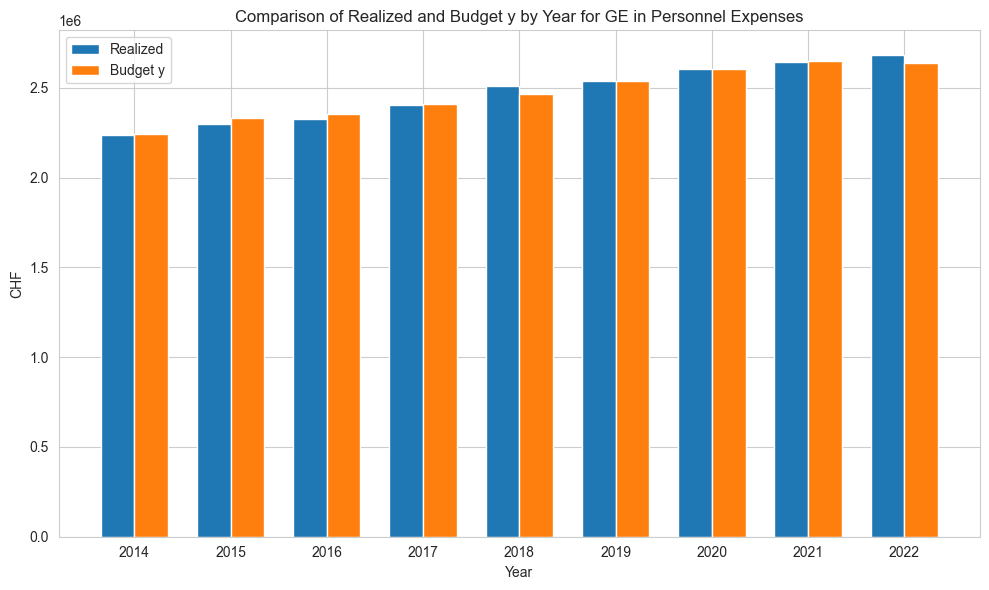

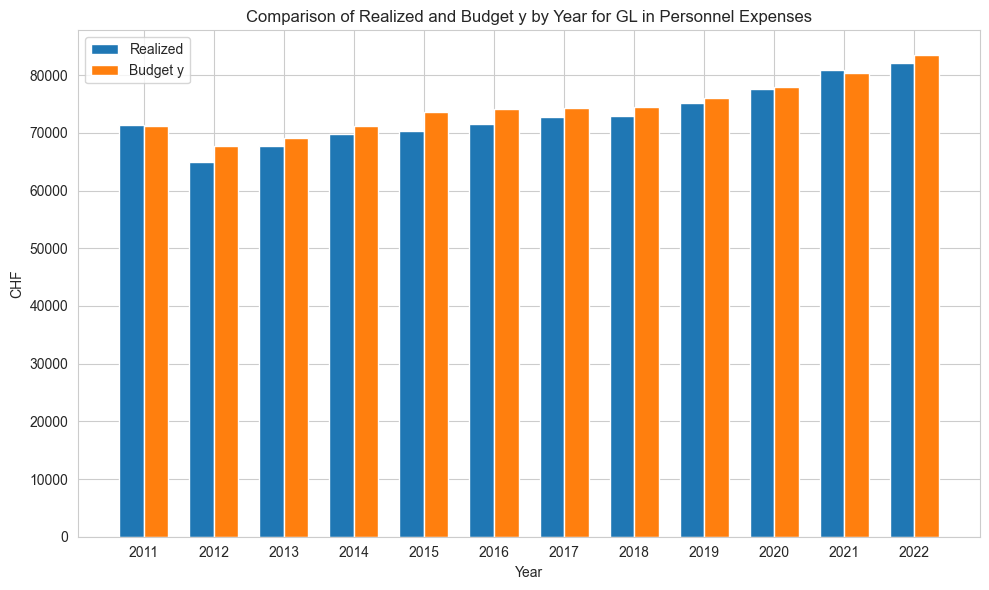

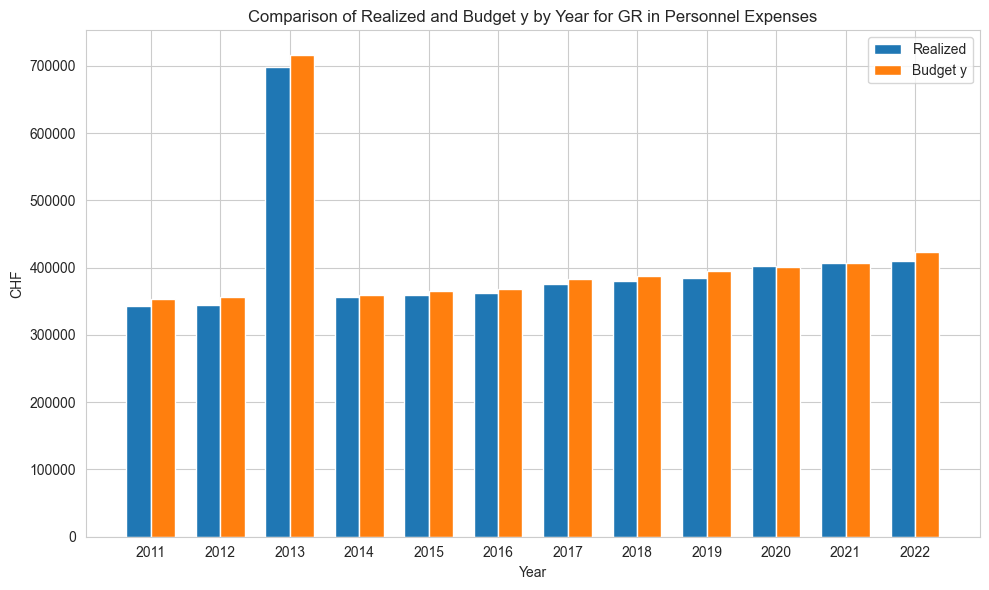

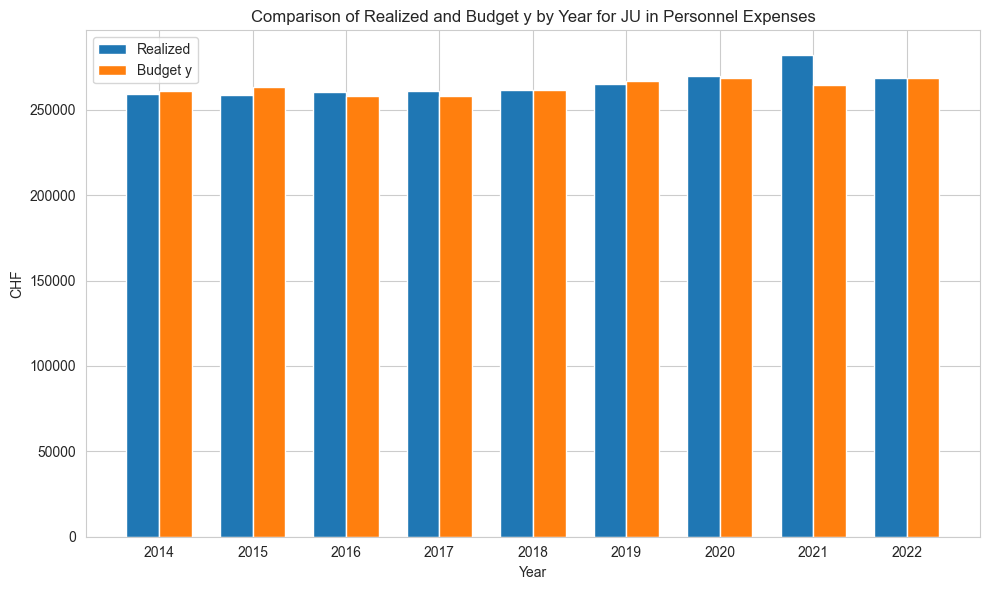

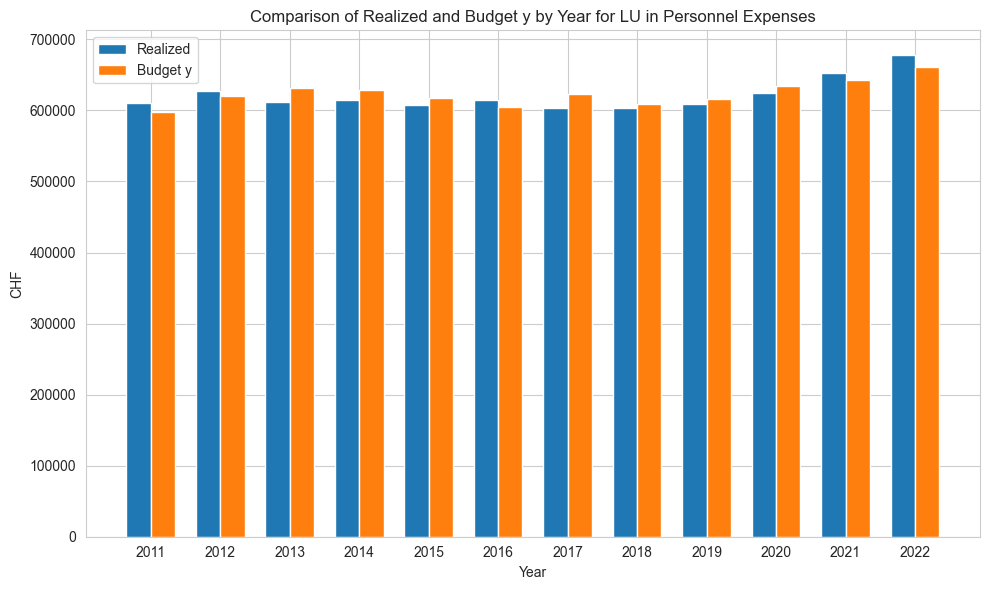

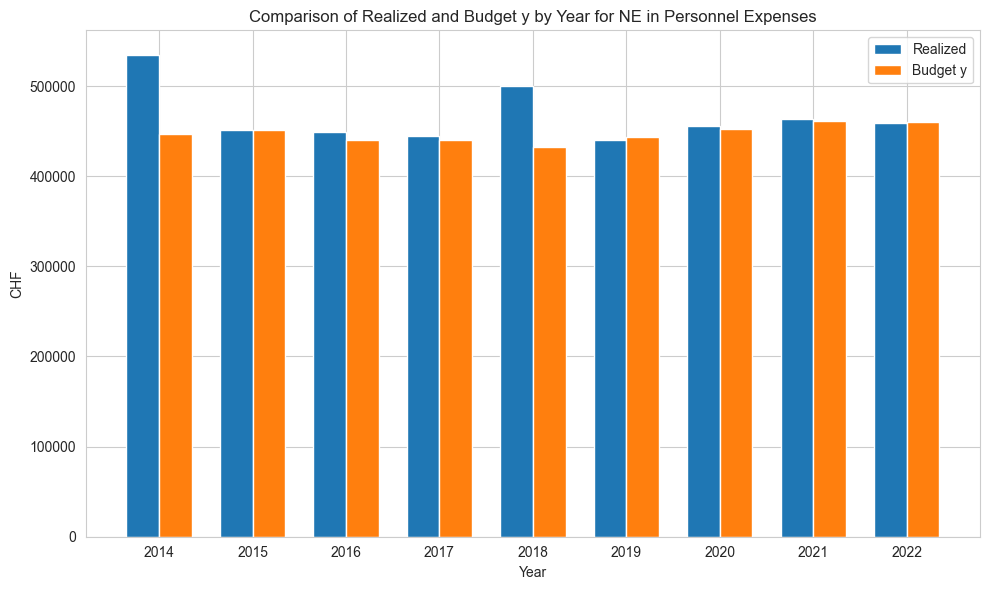

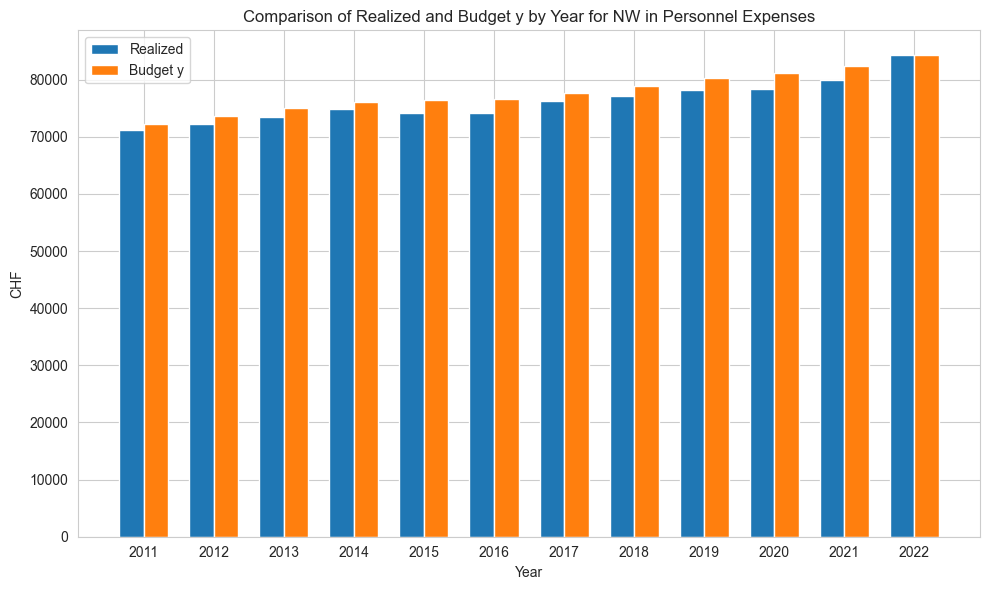

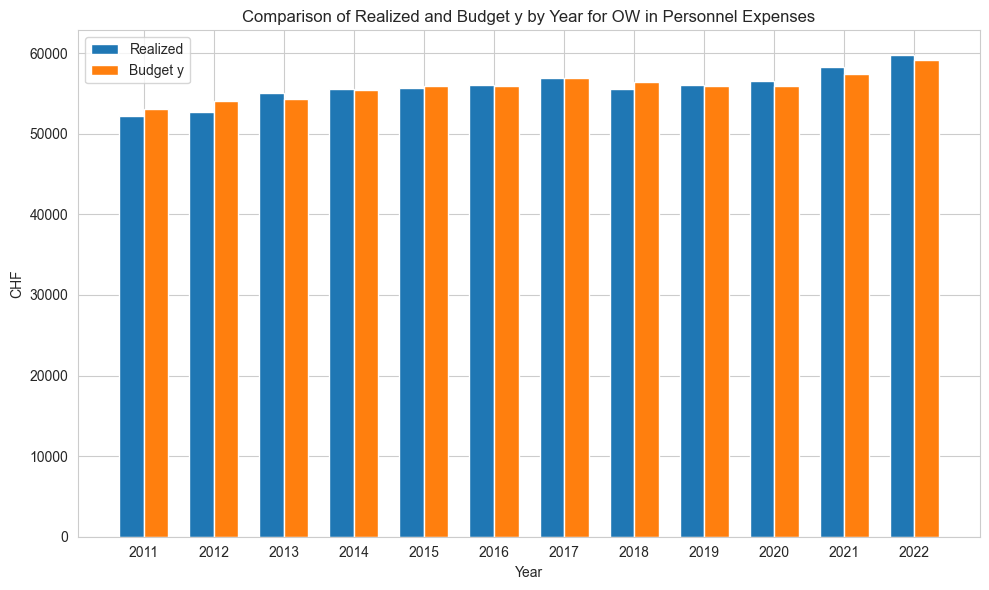

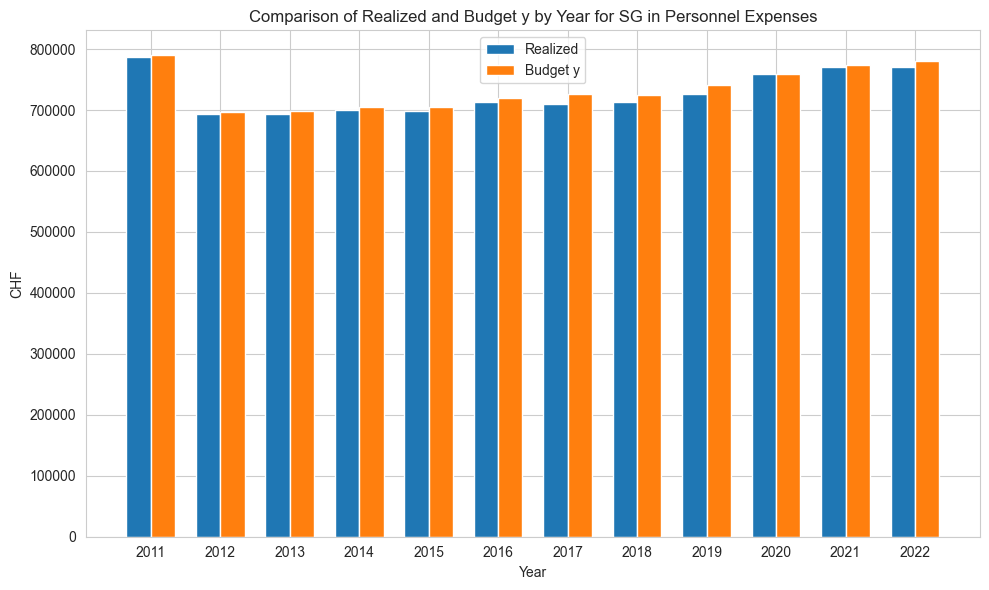

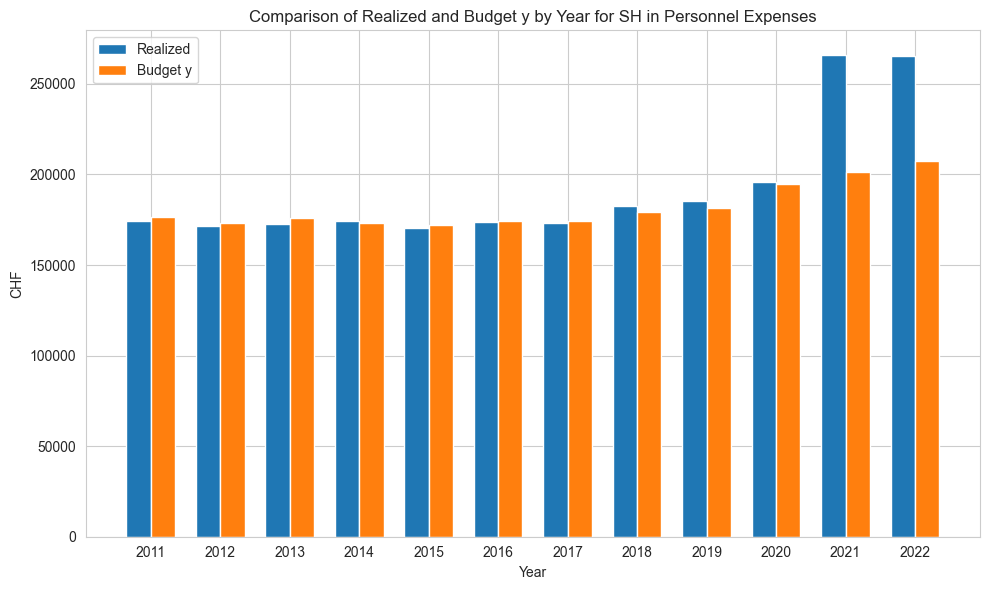

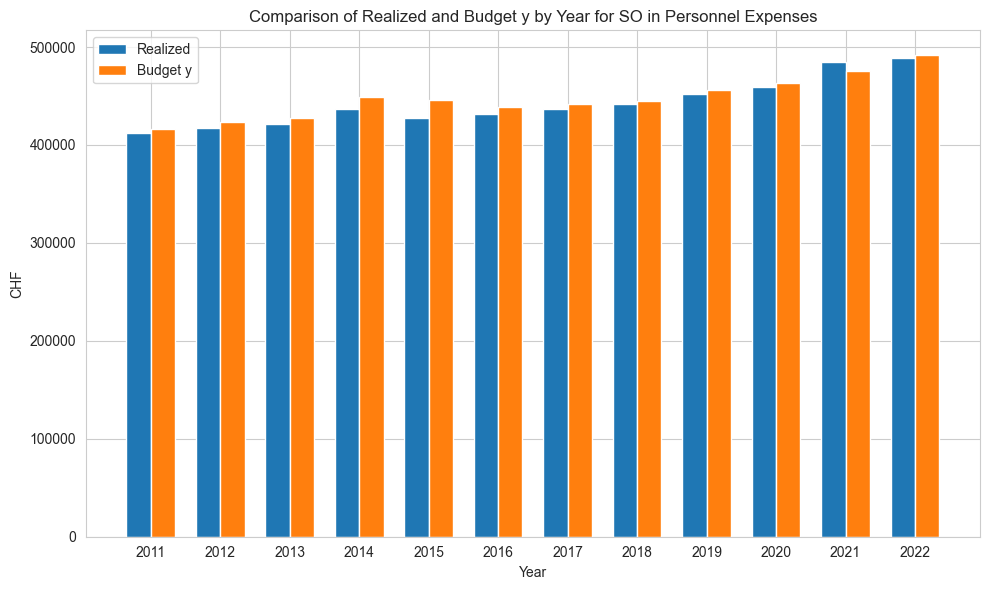

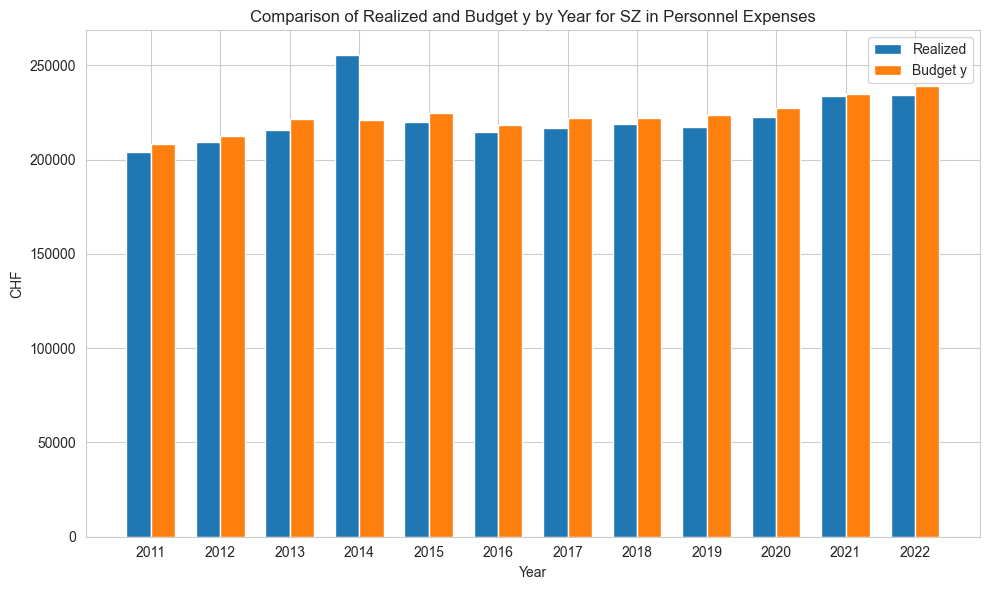

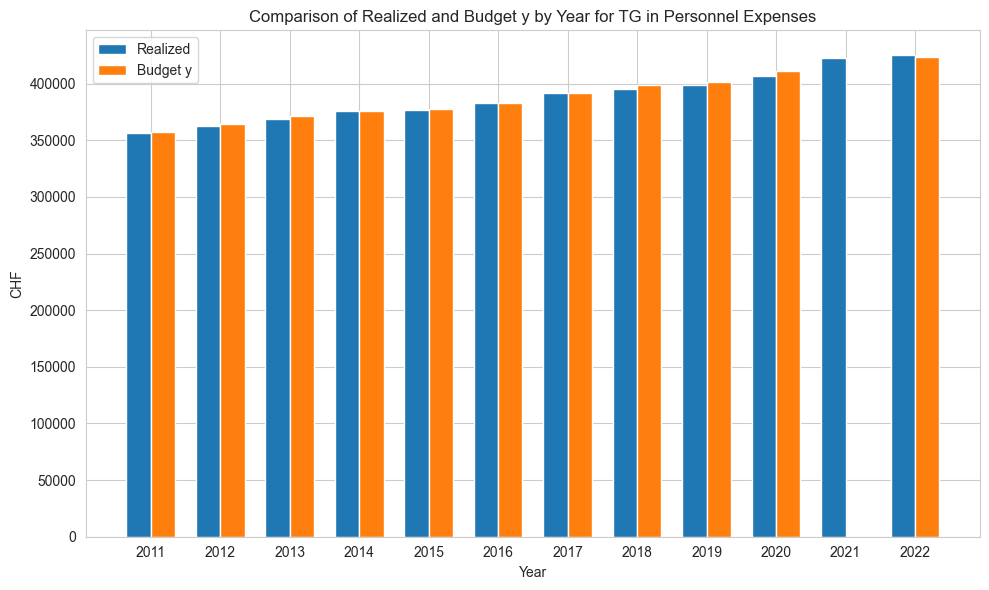

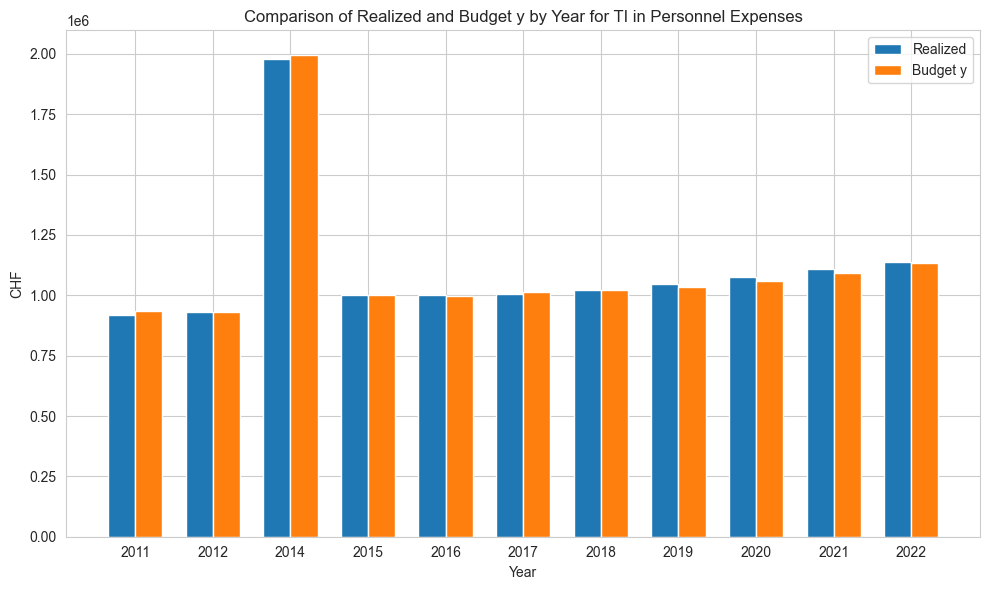

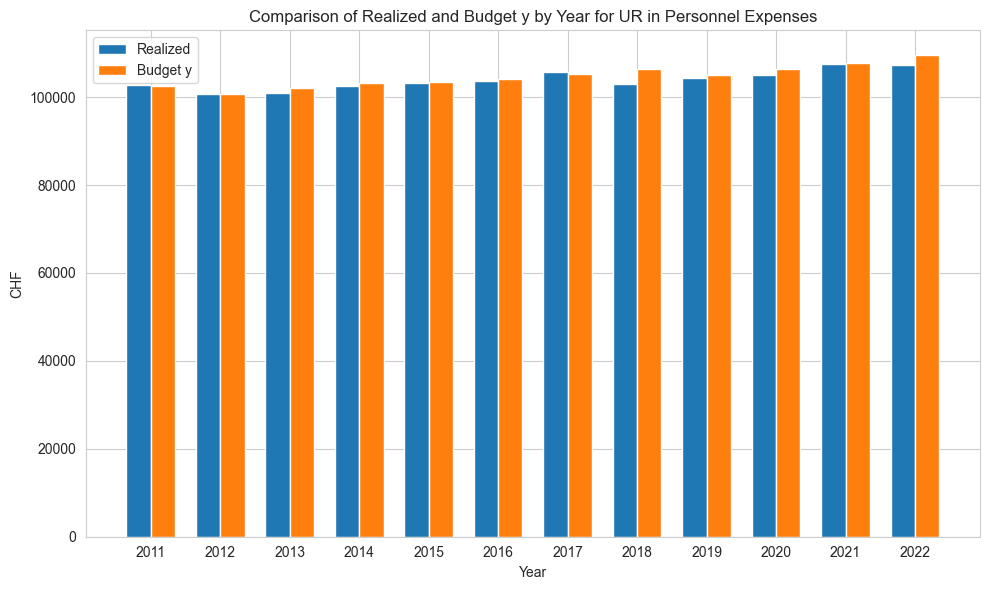

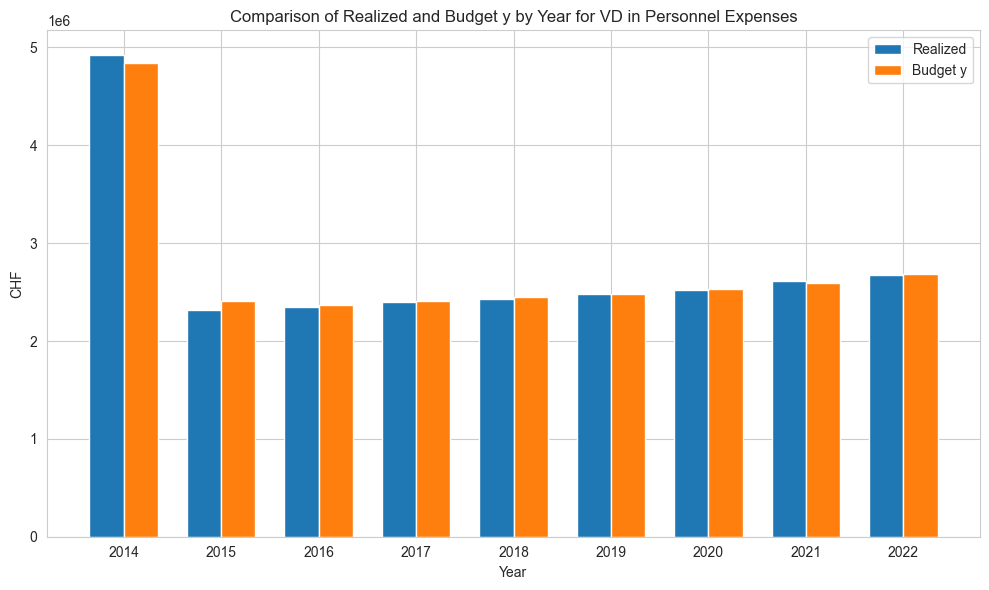

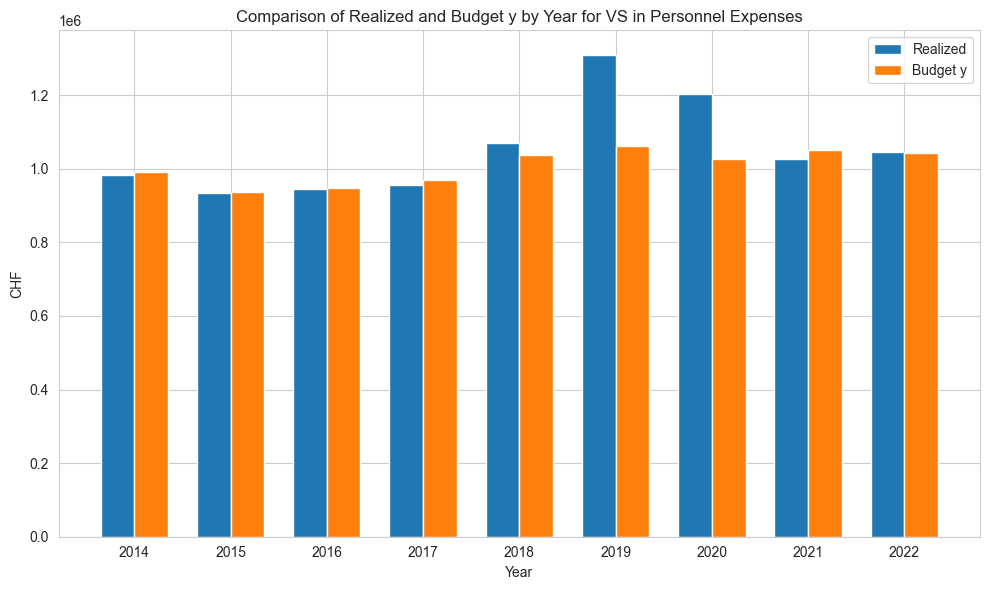

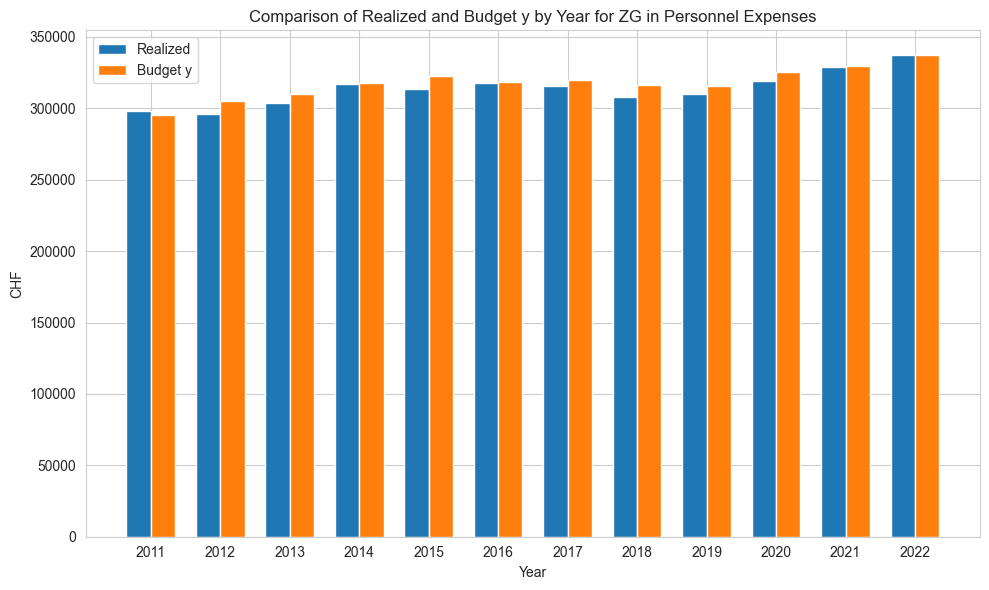

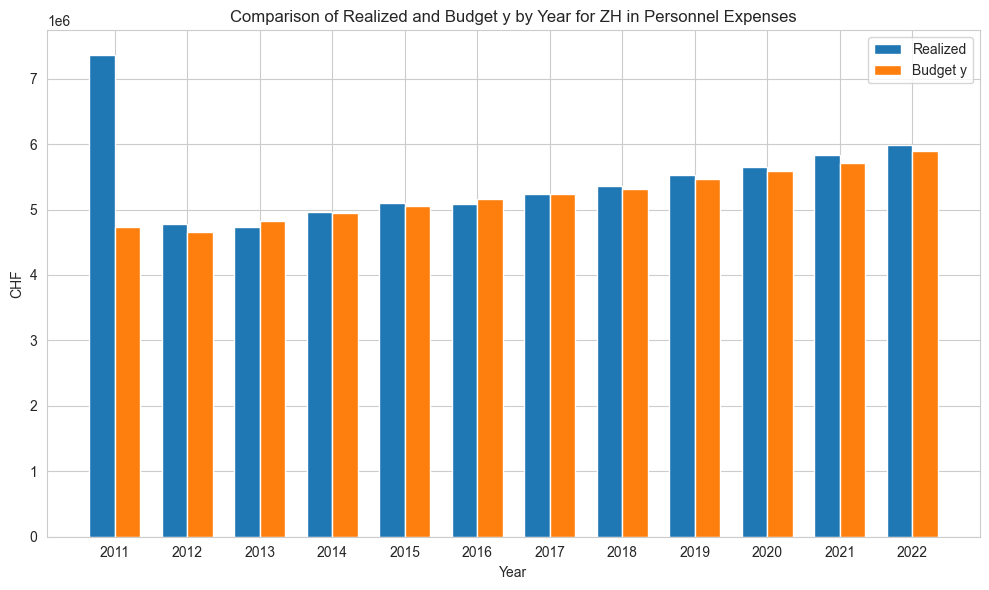

In [18]:
# Get unique cantons (regions)
cantons = personel_expenses_df['Region'].unique()

# Create a bar plot for each canton separately
for canton in cantons:
    canton_data = personel_expenses_df[personel_expenses_df['Region'] == canton]
    
    # Group the data by year and calculate the sum of 'Realized' and 'Budget y' for each year
    grouped_data = canton_data.groupby('Year')[['Realized', 'Budget y']].sum().reset_index()

    # Set the years as the x-axis labels
    years = grouped_data['Year']

    # Get the Realized and Budget y values for each year
    realized_values = grouped_data['Realized']
    budget_values = grouped_data['Budget y']

    # Define the width of each bar
    bar_width = 0.35

    # Create an index for the x-axis positions of the bars
    x = range(len(years))

    # Create the bar plots
    plt.figure(figsize=(10, 6))
    plt.bar(x, realized_values, width=bar_width, label='Realized', align='center')
    plt.bar([i + bar_width for i in x], budget_values, width=bar_width, label='Budget y', align='center')

    # Set x-axis labels and title
    plt.xlabel('Year')
    plt.xticks([i + bar_width / 2 for i in x], years)
    plt.ylabel('CHF')
    plt.title(f'Comparison of Realized and Budget y by Year for {canton} in Personnel Expenses')
    
    # Add a legend
    plt.legend()

    # Show the plot for each canton separately
    plt.tight_layout()
    plt.show()